In [186]:
from Scripts import ScriptOptions 
import os

params= ScriptOptions(
    ImageFolder= r"./TestPic/",
    model='big', #Ещё есть convnext, swinv2, big, vit
    gen_threshold=0.35, #увереность для общей картинки/и если не установлено значение в конфиге yolo моделей то для них тоже
    char_threshold=0.75, # Увереность для персонажей, теги персонажей берутся только из полной области, по причине я так захотел
    batch=2,
    recursive=False,
    save_txt=True,
    append_txt=True
)



In [188]:
from Scripts import BatchTagging
result=BatchTagging(params)

Не удалось загрузить pytorch_model.bin: 404 Client Error. (Request ID: Root=1-67c79d82-300fc78a2357c84842a02e80;cef39bea-2253-4bbc-bafb-4590a6f35770)

Entry Not Found for url: https://huggingface.co/SmilingWolf/wd-eva02-large-tagger-v3/resolve/main/pytorch_model.bin.
Файл config.json уже существует в models\taggers\wd-eva02-large-tagger-v3
Файл model.safetensors уже существует в models\taggers\wd-eva02-large-tagger-v3
Файл selected_tags.csv уже существует в models\taggers\wd-eva02-large-tagger-v3
Загрузка модели тегирования 'big' из 'SmilingWolf/wd-eva02-large-tagger-v3'...
Loading model from models\taggers\wd-eva02-large-tagger-v3\model.safetensors using safetensors
Загрузка списка тегов...
Загрузка тегов из локального файла: models\taggers\wd-eva02-large-tagger-v3\selected_tags.csv
Создание трансформации данных...
Загрузка конфигурации детекторов из detectors.json...
Загрузка модели YOLO person_yolov8s-seg.pt...
Loading YOLO model from local directory: models\yolo\person_yolov8s-seg.

In [190]:
# result[0][x] - теги по областям, для общей области, путь до изображения, какие детекторы и box для них Для Изображения X
# result[1][x] - обьедененые теги + путь до изображения X
print(result[1][0].keys())
print()
print(result[0][0].keys())
print()
print(result[1][0]['merged_tags'].keys())

dict_keys(['image_path', 'merged_tags', 'txt_path'])

dict_keys(['image_path', 'full_image', 'detectors'])

dict_keys(['caption', 'taglist', 'general', 'character', 'ratings'])


In [192]:
print(result[1][3]['merged_tags']['caption'])
print()
print(result[1][3]['merged_tags']['taglist'])

1boy, 1girl, ahoge, araragi_koyomi, back, black_hair, blonde_hair, blurry, blush_stickers, brother_and_sister, chair, crossed_arms, depth_of_field, dimples_of_venus, dress, facing_away, from_behind, hetero, indian_style, letterboxed, long_hair, long_legs, looking_at_viewer, oshino_shinobu, sandals, shadow, short_hair, shorts, siblings, sitting, skirt, sundress, topless_male, white_dress, white_skirt, yellow_eyes

1boy, 1girl, ahoge, araragi koyomi, back, black hair, blonde hair, blurry, blush stickers, brother and sister, chair, crossed arms, depth of field, dimples of venus, dress, facing away, from behind, hetero, indian style, letterboxed, long hair, long legs, looking at viewer, oshino shinobu, sandals, shadow, short hair, shorts, siblings, sitting, skirt, sundress, topless male, white dress, white skirt, yellow eyes


In [194]:
print(result[0][1]['full_image']['taglist'])
print()
print(result[1][1]['merged_tags']['taglist'])

1girl, hat, long hair, sword, solo, weapon, blonde hair, yellow eyes, blush stickers, bandaid, bandaid on knee, bandaid on leg, bracelet, dress, fang, jacket on shoulders, pirate hat, planted sword, jewelry, planted, blue background, katana, pointy ears, looking at viewer, standing, jacket, white dress, contrapposto, collarbone, very long hair, black headwear, closed mouth, crossed arms, frown, skull and crossbones, fang out, coat, bangle, jolly roger, short dress, feet out of frame, flat chest, military jacket, legs apart, skin fang, peaked cap, simple background, shiny skin, oshino shinobu

1girl, bandaid, bandaid on knee, bandaid on leg, bangle, black headwear, black jacket, blonde hair, blue background, blush, blush stickers, body blush, bracelet, buttons, closed mouth, coat, collarbone, contrapposto, crossed arms, dress, fang, fang out, feet out of frame, flat chest, flipped hair, frown, hat, holding, jacket, jacket on shoulders, jewelry, jolly roger, katana, legs apart, long hair

In [204]:
bab=1

In [206]:
print(result[0][bab]["full_image"]['taglist'])


1girl, hat, long hair, sword, solo, weapon, blonde hair, yellow eyes, blush stickers, bandaid, bandaid on knee, bandaid on leg, bracelet, dress, fang, jacket on shoulders, pirate hat, planted sword, jewelry, planted, blue background, katana, pointy ears, looking at viewer, standing, jacket, white dress, contrapposto, collarbone, very long hair, black headwear, closed mouth, crossed arms, frown, skull and crossbones, fang out, coat, bangle, jolly roger, short dress, feet out of frame, flat chest, military jacket, legs apart, skin fang, peaked cap, simple background, shiny skin, oshino shinobu


In [208]:
print(result[1][bab]["merged_tags"]['taglist'])


1girl, bandaid, bandaid on knee, bandaid on leg, bangle, black headwear, black jacket, blonde hair, blue background, blush, blush stickers, body blush, bracelet, buttons, closed mouth, coat, collarbone, contrapposto, crossed arms, dress, fang, fang out, feet out of frame, flat chest, flipped hair, frown, hat, holding, jacket, jacket on shoulders, jewelry, jolly roger, katana, legs apart, long hair, looking at viewer, looking to the side, military hat, military jacket, open clothes, oshino shinobu, peaked cap, petite, pirate hat, planted, planted sword, pointy ears, shiny skin, shirt, short dress, simple background, skin fang, skull and crossbones, solo, standing, swept bangs, sword, thighs, v-shaped eyebrows, very long hair, weapon, white dress, yellow eyes


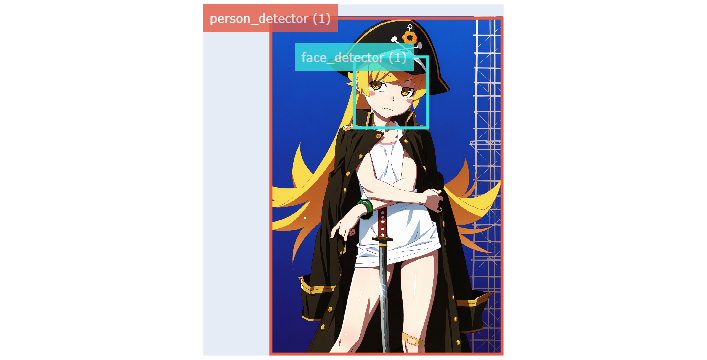

In [210]:
from Scripts import view_image_results
view_image_results(result, bab, visualize=True, save_visualization=False, verbose=False)